# COMP 4447 Final Project
- [Github Link](https://github.com/jimmyyih518/TOOLS1_FINAL_PROJECT)
- Project Team: Max and Jimmy
- Winter 2023

## Dataset and Motivation

The ongoing housing crisis in multiple prominent cities throughout North America has been a major motivation behind our selection of real estate data for the COMP 4447 final project. For this particular project, our dataset will focus on two coastal cities, Vancouver in BC Canada and Los Angeles in CA USA, where housing costs are generally viewed as "inflated". Our goal is to better understand the housing market and hope to derive insights on factors that drive the difference in housing sale prices. 

The dataset will be comprised entirely of web-scraped data from Zillow. Due to the anti-scraping mechanisms where after a certain number of request calls a cloudfare "human verification" will appear, we acknowledge that our dataset may be incomplete. However as later described in the web-scraping section, even with the incomplete dataset it can still be viewed as generally representative. 

Due to the general lack of available sold listing price data, we will use the listing sale price data as the focus for our analysis. Future work can definitely extend into the actual sold prices of these houses and compare that with the sale listing price.

One other observation we're investigating is whether there's any potential difference in factors that drive housing prices between the Canadian and USA markets, based on the comparison between trends in Vancouver and Los Angeles. 

Metadata:
- Date Scraped: Feb 10, 2023
- Total number of Listings scraped in Vancouver: 4322
- Total number of Listings scraped in Los Angeles: 11153
- Additional metadata and a complete summary of our dataset can be found in the [data cleaning](#Data-Dictionary-of-Variables) section below
- The reference to "house" hereby refers to all property types including but not limited to single family house, duplex house, townhouse, apartment and condominium units, etc

## Literature Review and References
- Data Analysis: predicting the housing market using Python, W.Weldon, Mar 2019, [reference link](https://towardsdatascience.com/data-analysis-predicting-the-housing-market-using-python-eae4f9fbd4e5)

- Real Estate House Price Prediction Using Data Science, Varun Sonavni, Sept 2021, [reference link](https://python.plainenglish.io/data-science-project-real-estate-house-price-prediction-website-df71ac98a132)

- House Prices - Exploratory Data Analysis, Amazon AWS, [reference link](https://rstudio-pubs-static.s3.amazonaws.com/378009_aa5c0f996b884a68ac3d09d98865e35e.html)

- Web Scrape Zillow Real Estate Data, Manthan Koolwal, May 2022, [reference link](https://www.scrapingdog.com/blog/scrape-zillow/)

- Housing Market Activity Off to a Slow Start, Brendon Ogmundson, Feb 2023, BCREA, [reference link](https://www.bcrea.bc.ca/economics/housing-market-activity-off-to-a-slow-start-in-2023/)

- Canadian home sales begin 2023 at 14-year low, Pierre Leduc, Feb 2023, CREA, [reference link](https://www.crea.ca/media-hub/news/canadian-home-sales-begin-2023-at-14-year-low/)

- The Housing and Economic Experiences of Immigrants in US and Canadian Cities, Carlos Texeira, University of Toronto Press 2015, [reference link](https://www.degruyter.com/document/doi/10.3138/9781442622890-006/html)

- VANCOUVER REAL ESTATE MARKET UPDATE JANUARY 2023, Alan Kelly, Feb 2023, Bode, [reference link](https://home.bode.ca/blog/vancouver-real-estate-market-update-january-2023/)

- Los Angeles Housing Market: Prices, Trends, Forecast 2023, Marco Santarelli, Feb 2023, Norada, [reference link](https://www.noradarealestate.com/blog/los-angeles-real-estate-market/)

- California Housing Market Report, Gord Collins, Jan 2023, ManageCasa, [reference link](https://managecasa.com/articles/california-housing-market-report/)



The engineered features "distance to waterfront" and "distance to city center" that we have developed for our analysis is a novel approach in analyzing housing data. While mainstream analysis of housing data typically focuses on variables such as time-based trends, square footage, number of bedrooms, and hollistic location descriptions, our approach takes the another step in feature engineering by deriving a geolocation based feature that represents an estimated distance of a house to a particular landmark. 

Distance to Waterfront:
- By drawing a coastline polygon and calculating the distance of each house's latitude/longitude to the coastline, we have introduced a new variable may impact the desirability of a property's location. Overall, our approach investigates the importance of considering location-based factors in analyzing housing data and can extend to a multitude of other location-based factors such as distance to particular points of interests for stakeholders in the real estate industry.

Distance to City Center:
- Using the publicly available longitude and latitude coordinates of each respective city's downtown center as the reference point, our hypothesis is that the proximity of a real estate property to this city center reference point should have an influence on its prices. Generally the majority of a city's amenities can be found within a certain radius of city center, therefore our distance to city center feature could offer some insights to housing values

## Task Definition and Research Question

### Research Question
Based on available data from house sale listings, which of distance to waterfront or distance to city center has a higher influence on sale listing price compared to other standard features from the listing such as square footage, number of bedrooms number of bathrooms, etc. Also is there a significant difference in the effect between the Canadian and US housing markets based on the samples from Vancouver BC and Los Angeles CA?

### Input Data
- Web scraped data from Zillow for available listings in Vancouver BC and Los Angeles CA, limited to the website's anti-scraping threshold. 
- Engineered features from scraped data for each listing, including distance to waterfront and distance to city center

### Output
- Summary statistics of data for properties listed for sale in Vancouver BC and Los Angeles CA
- Visualizations that reveal correlations between house prices and features extracted from the sale listing

# Data Science Pipeline
### Planning >> Data Collection >> Data Cleanup >> Visualization >> Deliver Insight

Planning 
- Creating a GitHub site for easy file management and collaboration
- Brainstorm on topics and identify data sources

Data Collection
- Scraping data from Zillow website
- Create custom features as data is being scraped
- Output as json file for ingestion into next step

Data Cleanup
- Ingest json output from Data Collection and transform to tabular data for analysis
- Data review
- Identifying and removing outliers
- Output as csv file for ingestion into analysis and visualization step

Visualization
- Explore data for correlations between features

Deliver Insight
- Document all processes and code in Jupyter notebook
- Address initial research question

# Data Collection

### Zillow Scraping Full Example

### Import scraper and utility modules
- Create a "scraper" object that will perform the scraping of zillow website data
- Create bounding boxes of latitudes and longitudes for two cities Vancouver, BC in Canada and Los Angeles, CA in USA
- The data from these two cities will be combined for the final analysis

In [ ]:
from src.webscraper.zillow_scraper_v3 import ZillowScraper
from src.webscraper.utils.scraper_utils import *

scraper = ZillowScraper()

LA_box = {'west_bound': -118.7,
          'east_bound': -117.6,
          'south_bound': 33.5,
          'north_bound': 34.5}

Vancouver_box = {'west_bound': -123.35,
                 'east_bound': -122.7,
                 'south_bound': 49.0,
                 'north_bound': 49.4}

### Subdivide the query into smaller partitions
- Since Zillow's website limits the number of listings that can be returned from a scrape to a max of 500, there is a need to subdivide the scrape to capture as much data as possible
- The bounding box for each city is subdivided into 0.01 Square Kilometer sub-boxes, and the scraping will be performed on those iteratively
- This may still miss some listings in very high density areas (some sub-boxes still have more than 500 listings) but at least it should provide a decent representation of house listing data in each city for the analysis
- There are also boxes that are not likely to contain any listings (ie in the ocean), which doesn't pose problems since they'll just return zero listings and be passed over

In [ ]:
Vancouver_sub_boxes = divide_rectangle(Vancouver_box, limit=0.01)
LA_sub_boxes = divide_rectangle(LA_box, limit=0.01)

In [ ]:
# Visualize the data comprising one of the sub-boxes in Vancouver
sub_box = Vancouver_sub_boxes[0]
sub_box

In [ ]:
# Visualizing all of these sub-boxes on a map for Vancouver, BC
vancouver_map = visualize_boxes(Vancouver_sub_boxes)
vancouver_map

In [ ]:
# Visualizing all of these sub-boxes on a map for Los Angeles, CA
LA_map = visualize_boxes(LA_sub_boxes)
LA_map

### Once the sub-boxes are established, the scraping is performed via looping through all sub-boxes
- Parallizing this scrape will cause a ban from Zillow's anti-scraping mechanism, therefore we are limited to using single thread loop to go through all sub-boxes in each city
- The scrape takes ~2.5 hours to complete, and returned 4322 listings in Vancouver, and 11153 listings in Los Angeles

In [ ]:
vancouver_listings = []
for sub_box in Vancouver_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Vancouver, BC',
        )
    
    vancouver_listings += sub_box_data
    
print(f"Scraped a total of {len(vancouver_listings)} in Vancouver, BC, Canada")

In [ ]:
LA_listings = []
for sub_box in LA_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Los Angeles, CA',
        )
    
    LA_listings += sub_box_data
    
print(f"Scraped a total of {len(LA_listings)} in Los Angeles, CA, United States")

In [ ]:
# the raw outputs of the scrape is stored for future usage
json_savefile(vancouver_listings, "data/vancouver_listings_scraped.json")
json_savefile(LA_listings, "data/LA_listings_scraped.json")


In [ ]:
### Once the sub-boxes are established, the scraping is performed via looping through all sub-boxes
- Parallizing this scrape will cause a ban from Zillow's anti-scraping mechanism, therefore we are limited to using single thread loop to go through all sub-boxes in each city
- The scrape takes ~2.5 hours to complete, and returned 4322 listings in Vancouver, and 11153 listings in Los Angeles

vancouver_listings = []
for sub_box in Vancouver_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Vancouver, BC',
        )
    
    vancouver_listings += sub_box_data
    
print(f"Scraped a total of {len(vancouver_listings)} in Vancouver, BC, Canada")

LA_listings = []
for sub_box in LA_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Los Angeles, CA',
        )
    
    LA_listings += sub_box_data
    
print(f"Scraped a total of {len(LA_listings)} in Los Angeles, CA, United States")

# the raw outputs of the scrape is stored for future usage
json_savefile(vancouver_listings, "data/vancouver_listings_scraped.json")
json_savefile(LA_listings, "data/LA_listings_scraped.json")


### Obtaining the distance to waterfront
- Both cities are coastal cities, therefore the distance to waterfront is a common feature we can obtain for both sets of listings scrapd
- This is done by first creating a polyline manually that roughly traces the coast line to the pacific ocean
- Then for each listing we take its latitude and longitude obtained from the Zillow scrape, and estimate this property's distance to the nearest point along the polyine of the city's coastline
- From the utils module the point_to_line_dist() function will return a distance in kilometers

In [6]:
# starting from reading the scraped json file without rerunning the scraper
from src.webscraper.utils.scraper_utils import *
import json
import pandas as pd
import numpy as np

with open('data/vancouver_listings_scraped.json') as f:
    vancouver_listings = json.load(f)
    
with open('data/LA_listings_scraped.json') as f:
    LA_listings = json.load(f)

In [7]:
import folium

# obtained by manually estimating points along the coastline for Vancouver and Los Angeles to the Pacific Ocean

LA_coastline = [
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]

Vancouver_coastline = [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
]



In [8]:

# Create a folium map centered on Vancouver
vancouver_coastline_map = folium.Map(location=[49.2497, -123.1193], zoom_start=10)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(Vancouver_coastline, color="red", weight=2.5, opacity=1).add_to(vancouver_coastline_map)
vancouver_coastline_map

In [9]:
# Create a folium map centered on Los Angeles
LA_coastline_map = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(LA_coastline, color="red", weight=2.5, opacity=1).add_to(LA_coastline_map)
LA_coastline_map

In [10]:
# calculate the distance to the coastline for each property in Vancouver, BC

for listing in vancouver_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), Vancouver_coastline)
    listing['query_city'] = 'Vancouver'

# calculate the distance to the coastline for each property in Los Angeles, CA
for listing in LA_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), LA_coastline)
    listing['query_city'] = 'Los Angeles'
    

### Obtaining distance to City Center (Downtown Center)
- First the city center latitude and longitudes are obtains from google search, as follows
    - Vancouver Downtown: (49.282 , -123.1171)
    - Los Angeles Downtown: (34.088, -118.2518)
- Then the euclidian distance is calculated between each property listing's latitude and longitude to the respective city center location

In [11]:
vancouver_center = (49.282 , -123.1171)
LA_center = (34.088, -118.2518)

In [12]:
# calculate the distance to the city center for each property in Vancouver, BC

for listing in vancouver_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_city_center'] = euclid_dist((lat, long), vancouver_center)


# calculate the distance to the city center for each property in Los Angeles, CA
for listing in LA_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_city_center'] = euclid_dist((lat, long), LA_center)


### Observation on Coastline Estimation
As can be seen from both the Vancouver and Los Angeles maps, the coastline polygon is not exact, but it will suffice for our analysis needs as we are investigating high level correlations thus our distance to waterfront calculation does not need to be exact.

### Finally the two sets of listings are combined into a single list and written as the final scraped dataset for further processing in pandas

In [15]:
combined_listings = vancouver_listings+LA_listings
# Show the total number of listings combined from the two cities
print(len(combined_listings))
# Show the data in one of the listings as an example
combined_listings[1]

15475


{'zpid': '314544781',
 'price': 'C$499,999',
 'priceLabel': 'C$500K',
 'beds': 3,
 'baths': 2.0,
 'area': 1689,
 'latLong': {'latitude': 49.086514, 'longitude': -123.10376},
 'statusType': 'FOR_SALE',
 'statusText': 'House for sale',
 'isFavorite': False,
 'isUserClaimingOwner': False,
 'isUserConfirmedClaim': False,
 'imgSrc': 'https://photos.zillowstatic.com/fp/20ba9596fccc71832cf85fde546fdf95-p_e.jpg',
 'hasImage': True,
 'visited': False,
 'listingType': '',
 'variableData': None,
 'hdpData': {'homeInfo': {'zpid': 314544781,
   'zipcode': 'V4K1R9',
   'city': 'Delta',
   'state': 'BC',
   'latitude': 49.086514,
   'longitude': -123.10376,
   'price': 499999.0,
   'bathrooms': 2.0,
   'bedrooms': 3.0,
   'livingArea': 1689.0,
   'homeType': 'SINGLE_FAMILY',
   'homeStatus': 'FOR_SALE',
   'daysOnZillow': -1,
   'isFeatured': False,
   'shouldHighlight': False,
   'listing_sub_type': {'is_FSBA': True},
   'isUnmappable': False,
   'isPreforeclosureAuction': False,
   'homeStatusForHD

In [16]:
# save this output to a file for later use
json_savefile(combined_listings, 'data/zillow_all_listings_scraped.json')

json output file saved to data/zillow_all_listings_scraped.json


# Data Cleanup

### Objectives:
- Read JSON file
- Missing value imputation
- Removing illegal characters in numeric columns
- Extracting key information from free from fields
- Removing outliers

In [1]:
from src.data_manipulation.data_cleanup import clean_json_file
from src.data_manipulation.data_cleanup import clean_data
import pandas as pd
import numpy as np

inFile = './data/zillow_all_listings_scraped.json'
df = clean_json_file(inFile)

       price  bedrooms  bathrooms    sqft   city state   latitude  longitude  \
1   499999.0       3.0        2.0  1689.0  Delta    BC  49.086514 -123.10376   
2  1679000.0       4.0        4.0  2679.0  Delta    BC  49.089947 -123.09065   
3  1390000.0       5.0        4.0  3316.0  Delta    BC  49.022392 -123.09127   
4  5888000.0       8.0        8.0  8111.0  Delta    BC  49.014910 -123.09155   
5  1998000.0       5.0        4.0  4701.0  Delta    BC  49.013058 -123.09160   

        homeType homeStatus  ...  \
1  SINGLE_FAMILY   FOR_SALE  ...   
2  SINGLE_FAMILY   FOR_SALE  ...   
3  SINGLE_FAMILY   FOR_SALE  ...   
4  SINGLE_FAMILY   FOR_SALE  ...   
5  SINGLE_FAMILY   FOR_SALE  ...   

                                            features ind_HasPool  \
1  Adult Oriented, Marina Nearby, Recreation Near...       False   
2                                                 NA       False   
3                                                 NA       False   
4  Near Golf Course, Recreatio

In [2]:
from src.data_manipulation.utils import *

In [3]:
for column in ['query_city', 'distance_to_city_center', 'statusType']:
    json_data_column = json_to_column(inFile, column)
    df = pd.concat([df, json_data_column], axis=1)
    
df

,price,bedrooms,bathrooms,sqft,city,state,latitude,longitude,homeType,homeStatus,...,ind_ShoppingNearby,ind_Clubhouse,ind_RecreationNearby,ind_ParkNearby,ind_IsCornerLot,ind_IsCuldesac,price/sqft,query_city,distance_to_city_center,statusType
1,499999.0,3.0,2.0,1689.0,Delta,BC,49.086514,-123.10376,SINGLE_FAMILY,FOR_SALE,...,True,False,True,False,False,False,296.032564,Vancouver,21.812111,FOR_SALE
2,1679000.0,4.0,4.0,2679.0,Delta,BC,49.089947,-123.09065,SINGLE_FAMILY,FOR_SALE,...,False,False,False,False,False,False,626.726390,Vancouver,21.581143,FOR_SALE
3,1390000.0,5.0,4.0,3316.0,Delta,BC,49.022392,-123.09127,SINGLE_FAMILY,FOR_SALE,...,False,False,False,False,False,False,419.179735,Vancouver,29.042256,FOR_SALE
4,5888000.0,8.0,8.0,8111.0,Delta,BC,49.014910,-123.09155,SINGLE_FAMILY,FOR_SALE,...,True,False,True,False,False,False,725.927752,Vancouver,29.868189,FOR_SALE
5,1998000.0,5.0,4.0,4701.0,Delta,BC,49.013058,-123.09160,SINGLE_FAMILY,FOR_SALE,...,True,False,True,False,False,False,425.015954,Vancouver,30.072898,FOR_SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,79.311472,FOR_SALE
15471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,82.959064,FOR_SALE
15472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,80.444164,FOR_SALE
15473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,77.374346,FOR_SALE


### Initial Cleaning of Data
- Remove rows where price is not available
- Filter out properties under 50000 dollars price
- Filter out properties with > 8 garages
- Filter out square footage > 10000 sqft and < 300 sqft
- Filter out number of bedrooms > 15
- Filter out number of bathrooms > 15
- Filter to only statusType = FOR_SALE
- Convert Vancouver prices to USD by multiplying by 1.33 (roughly the conversion rate)
- Remove State WA data, these were accidentally brought in with the Vancouver scrape
- Adding a "city_homeType" column by concatenating the query city and homeType

In [127]:
df_clean = df[(df['ind_HasGarage'] < 8 ) & 
              (df['sqft'] < 10000 ) & 
              (df['sqft'] > 300) & 
              (df['bedrooms'] < 15 ) & 
              (df['bathrooms'] < 15 ) &
              (df['statusType'] == 'FOR_SALE') &
             (df['state'].isin(['BC', 'CA'])) 
             ]

df_clean['price'] = np.where(df_clean['query_city']=='Vancouver', df_clean['price']/1.33, df_clean['price'])
df_clean['price/sqft'] = np.where(df_clean['query_city']=='Vancouver', df_clean['price/sqft']/1.33, df_clean['price/sqft'])
df_clean = df_clean[(df_clean['price']>10000)]
df_clean['city_homeType'] = df_clean['query_city'] + df_clean['homeType']

#### Summary of the dataset after the initial cleaning
- First and Last five rows displayed
- Summary statistics of numerical columns
- Data type of each column
- Check if any column still has null values

In [128]:
pd.set_option('display.max_columns', None)
## Data sample
display(df_clean.head(5))
display(df_clean.tail(5))

,price,bedrooms,bathrooms,sqft,city,state,latitude,longitude,homeType,homeStatus,distance_to_waterfront,additional_info,ind_HasGarage,features,ind_HasPool,ind_GolfCourseNearby,ind_ShoppingNearby,ind_Clubhouse,ind_RecreationNearby,ind_ParkNearby,ind_IsCornerLot,ind_IsCuldesac,price/sqft,query_city,distance_to_city_center,statusType,city_homeType
1,3.759391e+05,3.0,2.0,1689.0,Delta,BC,49.086514,-123.10376,SINGLE_FAMILY,FOR_SALE,5.255870,"{'garage_stalls': None, 'features': 'Adult Ori...",0.0,"Adult Oriented, Marina Nearby, Recreation Near...",False,False,True,False,True,False,False,False,222.580875,Vancouver,21.812111,FOR_SALE,VancouverSINGLE_FAMILY
2,1.262406e+06,4.0,4.0,2679.0,Delta,BC,49.089947,-123.09065,SINGLE_FAMILY,FOR_SALE,6.365244,"{'garage_stalls': 2, 'features': None}",2.0,NA,False,False,False,False,False,False,False,False,471.222850,Vancouver,21.581143,FOR_SALE,VancouverSINGLE_FAMILY
3,1.045113e+06,5.0,4.0,3316.0,Delta,BC,49.022392,-123.09127,SINGLE_FAMILY,FOR_SALE,1.259603,"{'garage_stalls': None, 'features': None}",0.0,NA,False,False,False,False,False,False,False,False,315.172733,Vancouver,29.042256,FOR_SALE,VancouverSINGLE_FAMILY
4,4.427068e+06,8.0,8.0,8111.0,Delta,BC,49.014910,-123.09155,SINGLE_FAMILY,FOR_SALE,0.934214,"{'garage_stalls': 3, 'features': 'Near Golf Co...",3.0,"Near Golf Course, Recreation Nearby, Shopping ...",False,True,True,False,True,False,False,False,545.810340,Vancouver,29.868189,FOR_SALE,VancouverSINGLE_FAMILY
5,1.502256e+06,5.0,4.0,4701.0,Delta,BC,49.013058,-123.09160,SINGLE_FAMILY,FOR_SALE,0.855680,"{'garage_stalls': 1, 'features': 'Near Golf Co...",1.0,"Near Golf Course, Greenbelt, Recreation Nearby...",False,True,True,False,True,False,False,False,319.560868,Vancouver,30.072898,FOR_SALE,VancouverSINGLE_FAMILY


,price,bedrooms,bathrooms,sqft,city,state,latitude,longitude,homeType,homeStatus,distance_to_waterfront,additional_info,ind_HasGarage,features,ind_HasPool,ind_GolfCourseNearby,ind_ShoppingNearby,ind_Clubhouse,ind_RecreationNearby,ind_ParkNearby,ind_IsCornerLot,ind_IsCuldesac,price/sqft,query_city,distance_to_city_center,statusType,city_homeType
15449,675000.0,3.0,3.0,3206.0,Pinon Hills,CA,34.414772,-117.639610,SINGLE_FAMILY,FOR_SALE,91.302979,"{'garage_stalls': 4, 'features': '0-1 Unit/Acr...",4.0,"0-1 Unit/Acre, Corner Lot, Desert Back, Desert...",False,False,False,False,False,False,True,False,210.542732,Los Angeles,77.249707,FOR_SALE,Los AngelesSINGLE_FAMILY
15455,610000.0,3.0,2.0,3226.0,Pinon Hills,CA,34.470516,-117.642430,SINGLE_FAMILY,FOR_SALE,96.260361,"{'garage_stalls': 2, 'features': '2-5 Units/Ac...",2.0,2-5 Units/Acre,False,False,False,False,False,False,False,False,189.088655,Los Angeles,80.092422,FOR_SALE,Los AngelesSINGLE_FAMILY
15456,179000.0,3.0,2.0,1248.0,Pinon Hills,CA,34.454758,-117.641266,MANUFACTURED,FOR_SALE,94.866632,"{'garage_stalls': 1, 'features': '2-5 Units/Ac...",1.0,2-5 Units/Acre,False,False,False,False,False,False,False,False,143.429487,Los Angeles,79.284789,FOR_SALE,Los AngelesMANUFACTURED
15457,430000.0,3.0,3.0,2782.0,Pinon Hills,CA,34.424570,-117.647540,MULTI_FAMILY,FOR_SALE,91.692103,"{'garage_stalls': None, 'features': 'Desert Ba...",0.0,"Desert Back, Desert Front, Level with Street, ...",False,False,False,False,False,False,False,False,154.565061,Los Angeles,76.996875,FOR_SALE,Los AngelesMULTI_FAMILY
15465,428000.0,4.0,2.0,1994.0,Pinon Hills,CA,34.470955,-117.632000,MANUFACTURED,FOR_SALE,96.939129,"{'garage_stalls': 2, 'features': '0-1 Unit/Acr...",2.0,"0-1 Unit/Acre, Agricultural, Corner Lot, Deser...",False,False,False,False,False,False,True,False,214.643932,Los Angeles,81.103826,FOR_SALE,Los AngelesMANUFACTURED


In [129]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft,latitude,longitude,distance_to_waterfront,ind_HasGarage,price/sqft,distance_to_city_center
count,1.271900e+04,12719.000000,12719.000000,12719.000000,12719.000000,12719.000000,12719.000000,12719.000000,12719.000000,12719.000000
mean,1.831235e+06,3.831355,3.200566,2401.751631,38.374152,-119.549400,19.580253,1.406085,713.090360,31.416868
std,2.512675e+06,1.811082,1.794598,1558.851607,6.894500,2.194353,15.542409,1.169862,509.264357,20.067708
min,3.490000e+04,0.000000,0.000000,317.000000,33.500732,-123.335670,0.002327,0.000000,46.600877,0.138762
25%,7.488880e+05,3.000000,2.000000,1333.000000,33.932737,-122.792958,7.329878,0.000000,460.920353,15.441585
50%,1.127669e+06,4.000000,3.000000,1937.000000,34.097263,-118.353470,16.716005,2.000000,591.633466,27.882921
75%,1.917293e+06,5.000000,4.000000,2993.500000,49.088628,-118.053345,26.329515,2.000000,793.001450,42.658374
max,4.500000e+07,14.000000,14.000000,9991.000000,49.398810,-117.600296,100.693531,7.000000,9759.638848,94.982458


In [130]:
df_clean.dtypes

price                      float64
bedrooms                   float64
bathrooms                  float64
sqft                       float64
city                        object
state                       object
latitude                   float64
longitude                  float64
homeType                    object
homeStatus                  object
distance_to_waterfront     float64
additional_info             object
ind_HasGarage              float64
features                    object
ind_HasPool                 object
ind_GolfCourseNearby        object
ind_ShoppingNearby          object
ind_Clubhouse               object
ind_RecreationNearby        object
ind_ParkNearby              object
ind_IsCornerLot             object
ind_IsCuldesac              object
price/sqft                 float64
query_city                  object
distance_to_city_center    float64
statusType                  object
city_homeType               object
dtype: object

In [131]:
df_clean.isnull().any()

price                      False
bedrooms                   False
bathrooms                  False
sqft                       False
city                       False
state                      False
latitude                   False
longitude                  False
homeType                   False
homeStatus                 False
distance_to_waterfront     False
additional_info            False
ind_HasGarage              False
features                   False
ind_HasPool                False
ind_GolfCourseNearby       False
ind_ShoppingNearby         False
ind_Clubhouse              False
ind_RecreationNearby       False
ind_ParkNearby             False
ind_IsCornerLot            False
ind_IsCuldesac             False
price/sqft                 False
query_city                 False
distance_to_city_center    False
statusType                 False
city_homeType              False
dtype: bool

In [132]:
# also check how many of each home type we have in our clean dataset
df_clean.groupby('homeType').size()

homeType
CONDO            1984
LOT                 1
MANUFACTURED      171
MULTI_FAMILY     1349
SINGLE_FAMILY    8402
TOWNHOUSE         812
dtype: int64

Based on the above observation, we want to focus on only the below types for analysis:
- CONDO
- MULTI_FAMILY
- SINGLE_FAMILY
- TOWNHOUSE

There is definitely a majority of single family type houses in our dataset, which is as expected for the North American real estate market in these two coastal cities

In [133]:
df_clean = df_clean[df_clean['homeType'].isin(['CONDO', 'MULTI_FAMILY', 'SINGLE_FAMILY', 'TOWNHOUSE'])]
df_clean.shape

(12547, 27)

### Additional Data Cleaning
- Outlier removals

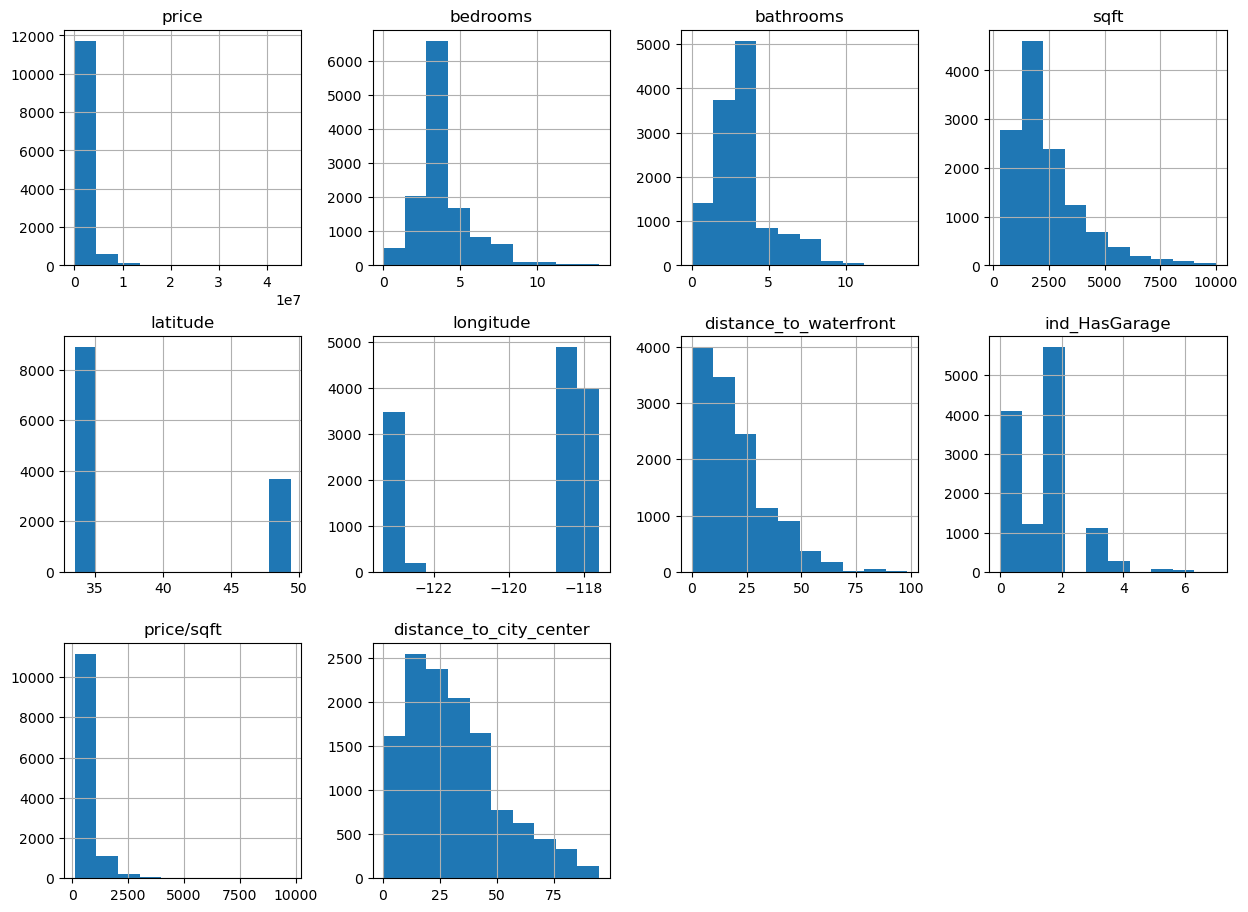

In [134]:
ax_list = df_clean.hist(bins=10, layout=(4,4), figsize=(15,15))


# Visualize Data

In [135]:
exclude_cols = ['latitude', 'longitude']
numeric_cols = [col for col in df_clean.columns if df_clean[col].dtype.kind in 'biufc']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
print('numeric columns for pairplot: ', numeric_cols)

numeric columns for pairplot:  ['price', 'bedrooms', 'bathrooms', 'sqft', 'distance_to_waterfront', 'ind_HasGarage', 'price/sqft', 'distance_to_city_center']


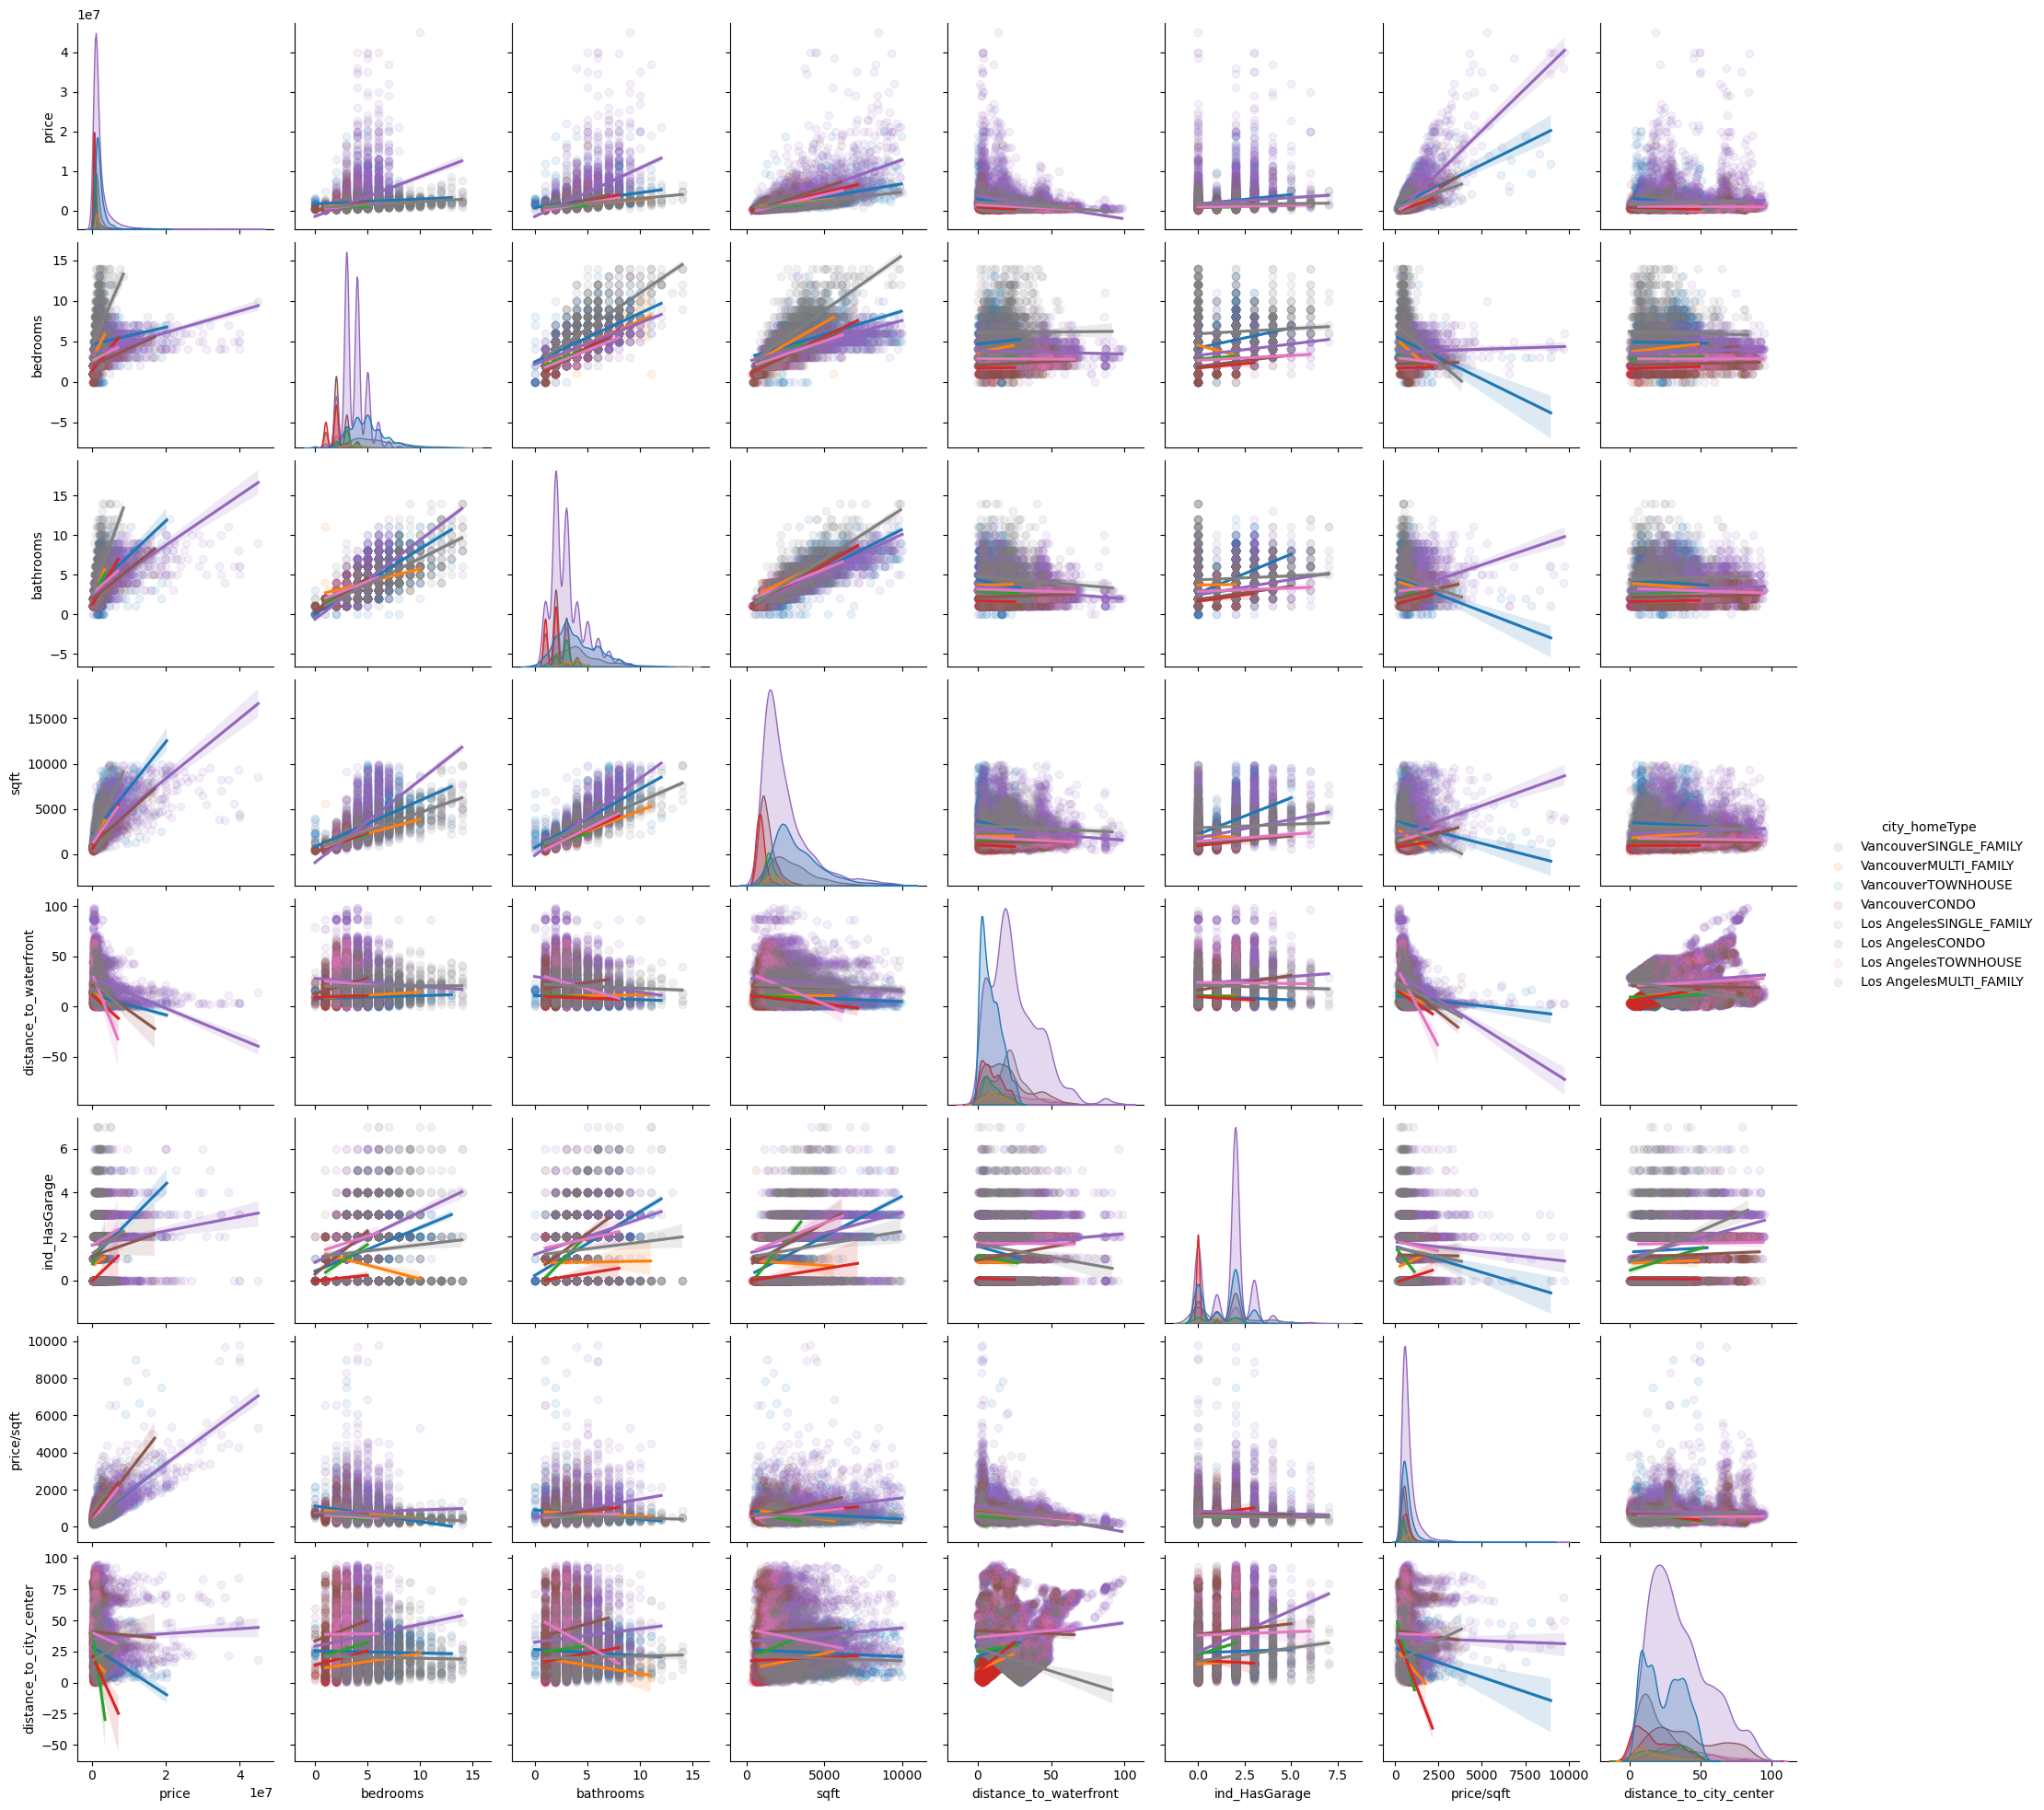

In [136]:
import seaborn as sns

sns.pairplot(df_clean[numeric_cols + ['city_homeType']], hue='city_homeType',  kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})

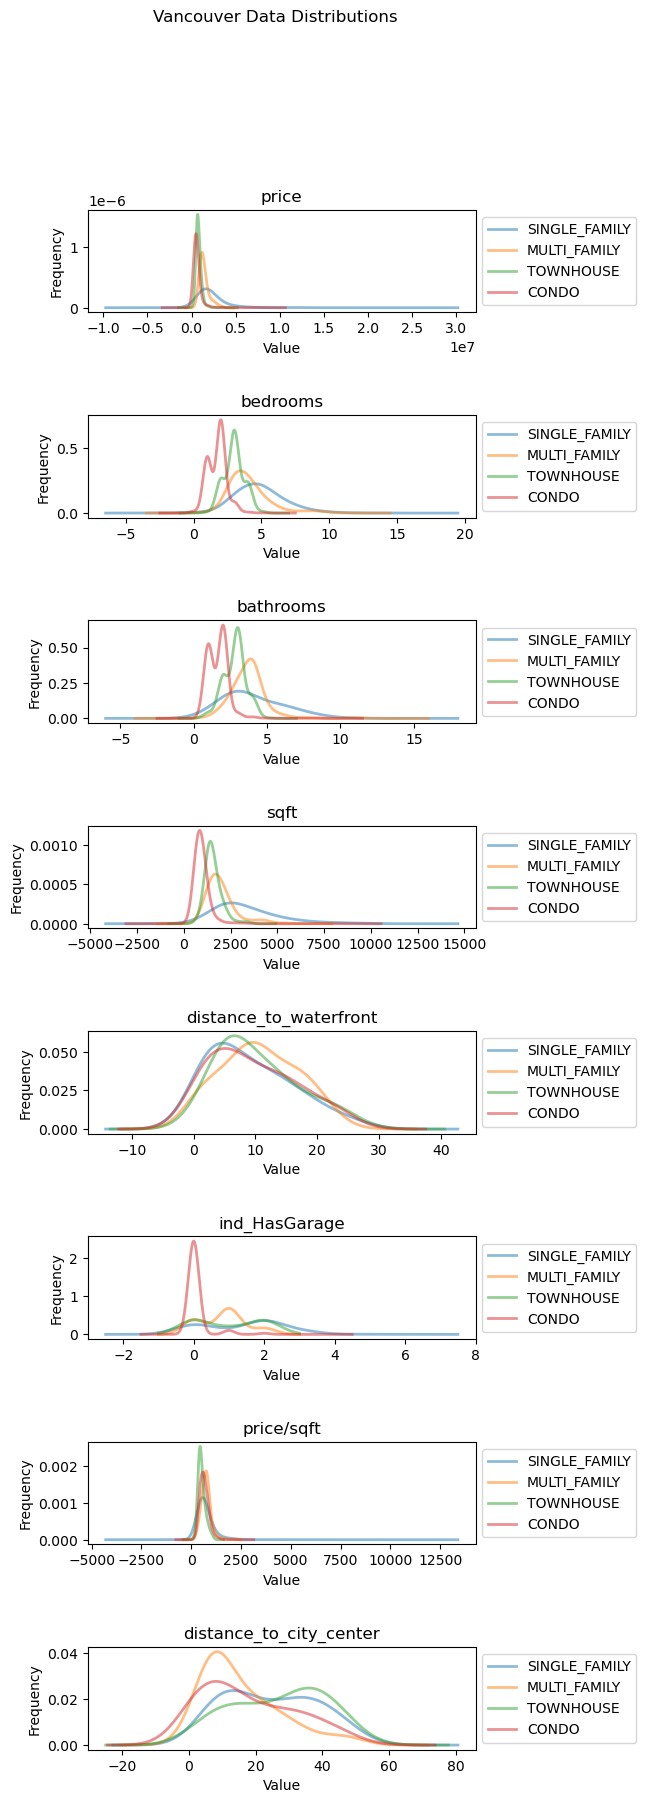

In [137]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Vancouver Data Distributions')
for i, column in enumerate(numeric_cols):
    for group in df_clean['homeType'].unique():
        df_clean[(df_clean['homeType'] == group) & (df_clean['query_city']=='Vancouver')][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

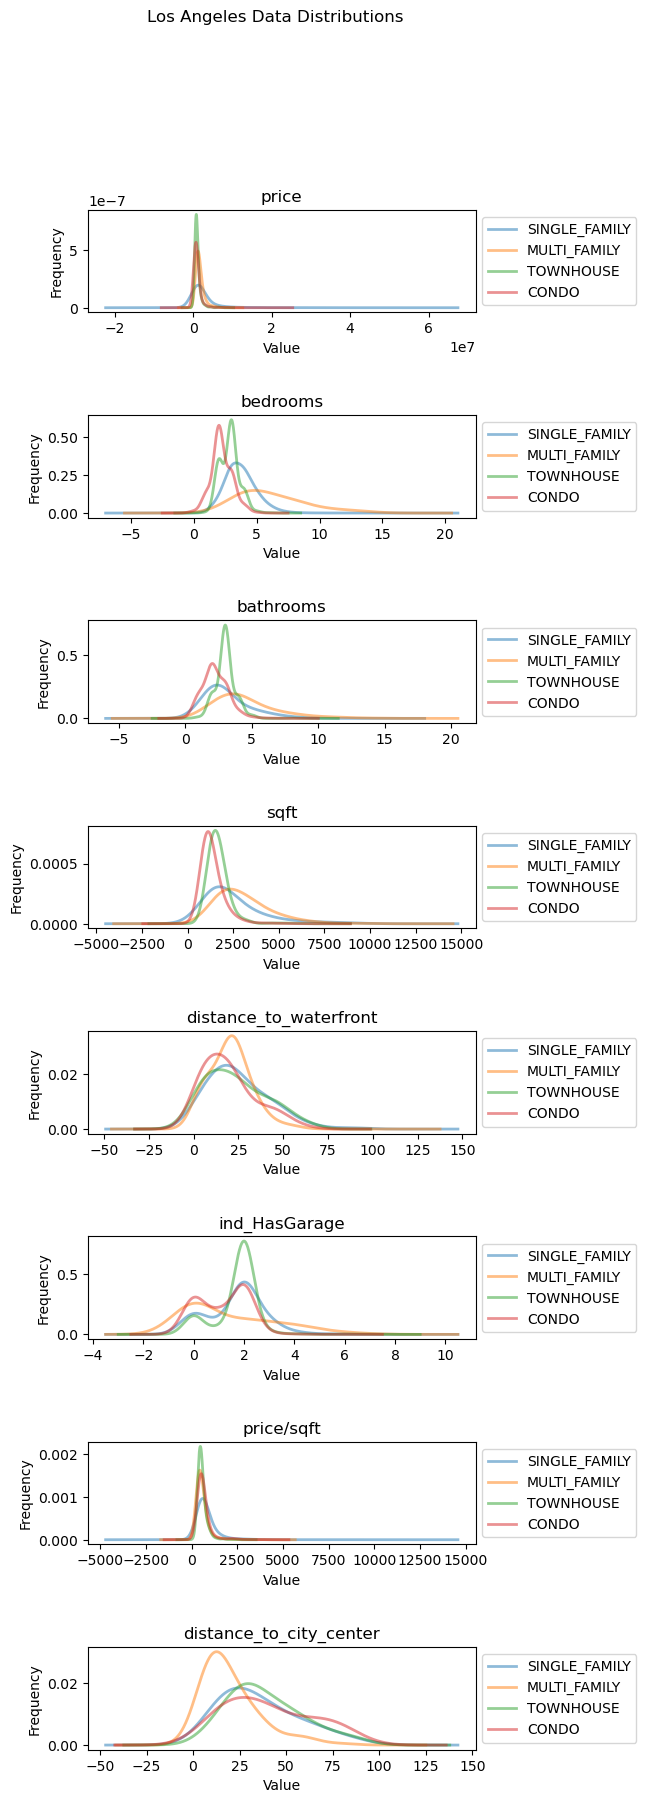

In [138]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Los Angeles Data Distributions')
for i, column in enumerate(numeric_cols):
    for group in df_clean['homeType'].unique():
        df_clean[(df_clean['homeType'] == group) & (df_clean['query_city']=='Los Angeles')][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

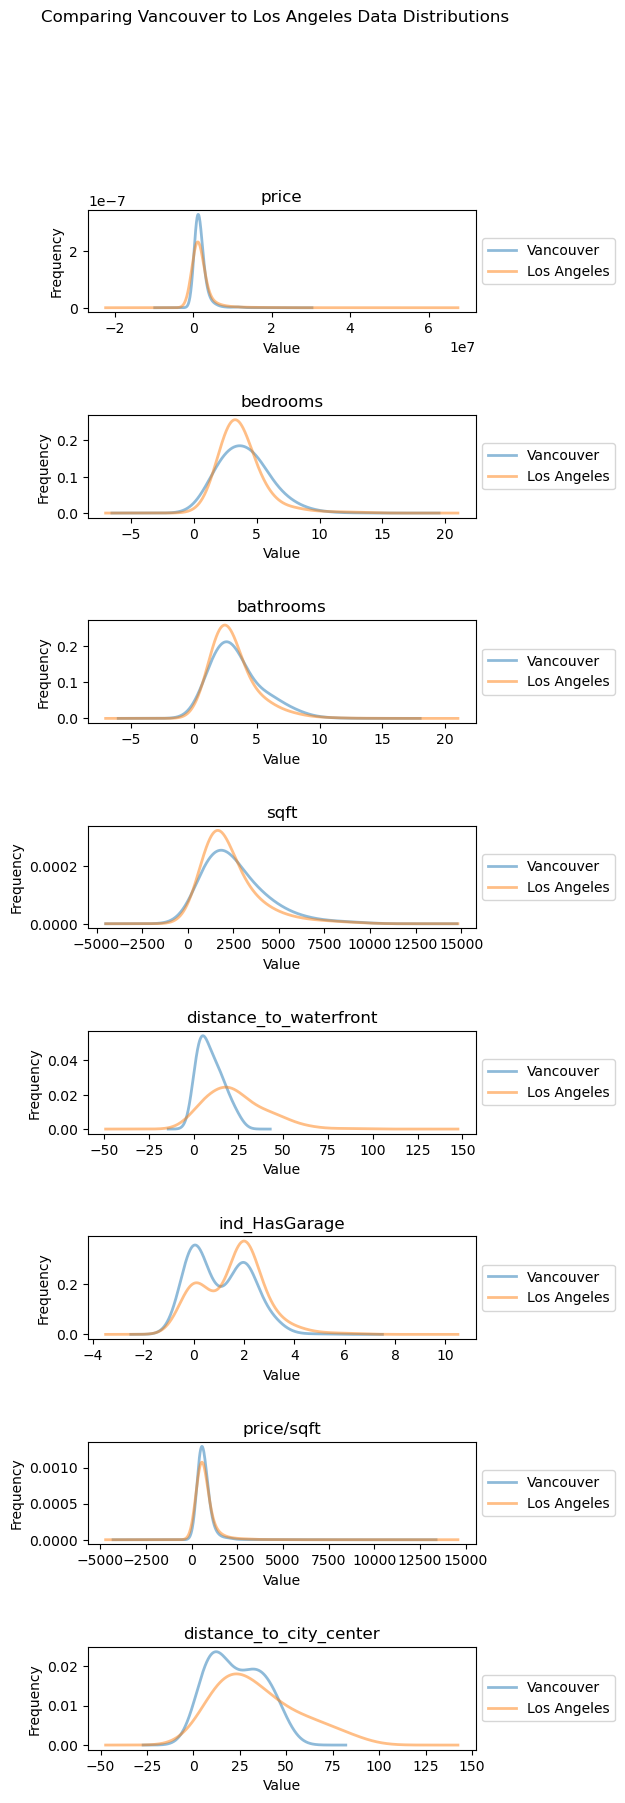

In [139]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Comparing Vancouver to Los Angeles Data Distributions')
for i, column in enumerate(numeric_cols):
    for group in df_clean['query_city'].unique():
        df_clean[(df_clean['query_city'] == group)][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

## Heat Map visualization of Price/Sqft

In [140]:
import folium
from folium.plugins import HeatMap
# create coastline dictionary 

coastline = {'BC': [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
],
            'CA':[
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]
}

city_centers = {
    'BC':(49.282 , -123.1171),
    'CA':(34.088, -118.2518),
}


# create initial map layers for the two cities
vancouver_heatmap = folium.Map(location=[49.2497, -123.1193], zoom_start=10)
LA_heatmap = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

gradient = {0.2: 'green', 0.4: 'blue', 0.6: 'yellow', 1: 'red'}

# create a function that generates the heatmap, and plots it out
def show_heatmap(state, map_column, map_base):
    
    init_map = folium.Map(location=map_base.location, zoom_start=10)
    
    folium.PolyLine(coastline[state], color="red", weight=2.5, opacity=1).add_to(init_map)
    df_filter = df_clean[df_clean['state']==state]
    max_val = df_filter[map_column].max()
    min_val = df_filter[map_column].min()
    q20_val = df_filter[map_column].quantile(0.2)
    q80_val = df_filter[map_column].quantile(0.8)
    
    data_price_locations = df_filter[['latitude', 'longitude', map_column]].values.tolist()
    city = 'Vancouver, BC' if state == 'BC' else 'Los Angeles, CA'
    heatmap_layer = HeatMap(data_price_locations, 
                            name=f'{city} Price/Sqft', 
                            min_opacity=0.1, 
                            radius=20,
                           min_val =q20_val,
                           max_val = q80_val,

                           )
    heatmap_layer.add_to(init_map)
    folium.LayerControl().add_to(init_map)
    folium.Marker(location=[city_centers[state][0], city_centers[state][1]], icon=folium.Icon(icon='star')).add_to(init_map)
    
    return init_map



In [141]:
display(show_heatmap('BC', 'price/sqft', vancouver_heatmap))
display(show_heatmap('CA', 'price/sqft', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_6852\1644519603.py:59: UserWarning:

The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.



C:\Users\JZ2018\AppData\Local\Temp\ipykernel_6852\1644519603.py:59: UserWarning:

The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.



In [142]:
display(show_heatmap('BC', 'price', vancouver_heatmap))
display(show_heatmap('CA', 'price', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_6852\1644519603.py:59: UserWarning:

The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.



C:\Users\JZ2018\AppData\Local\Temp\ipykernel_6852\1644519603.py:59: UserWarning:

The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.



### Heat Map Observations
While it is interesting that the higher value (both price and price/sqft) listings generally tend to not be very far from the waterfront, it can be seen that the trend is much more apparent in Vancouver, BC compared to Los Angeles, CA. 

In Vancouver almost all properties in communities that have are along the coastline appear to be higher priced. However in Los Angeles we only see a couple of communities along the coastline that are very high priced with the other areas along the coastline generally in the same price range as the rest of the city.

In [143]:
#pd.set_option('display.max_columns', None)
df_clean[df_clean['state'].isin(['BC','CA'])].groupby('state')[['price','price/sqft','sqft']].agg(['mean', 'median', 'min', 'max'])

price                                             price/sqft  \
               mean        median            min           max        mean   
state                                                                        
BC     1.751244e+06  1.345865e+06  161654.135338  2.021654e+07  685.871277   
CA     1.895146e+06  1.050000e+06   79950.000000  4.500000e+07  734.258152   

                                                   sqft                         
           median         min          max         mean  median    min     max  
state                                                                           
BC     602.296254  125.313283  8964.719491  2611.122850  2222.0  317.0  9949.0  
CA     593.420834  120.187166  9759.638848  2338.510468  1860.0  336.0  9991.0

This table shows summary statistics for the price, price/sqft and sqft data in each State (each city), with BC as Vancouver and CA as Los Angeles.

Overall although the mean price is relatively similar but Vancouver appears to have a much higher median price at <font color='red'>~1.35M</font> compared to LA at <font color='red'>1.05M</font>. 

The difference decreases substantially when comparing price per square feet, where the difference is ~49 USD/sqft, or a 6\% difference in the mean price/sqft between the two cities and ~9 USD/sqft or almost 1\% difference in the median price/sqft. 

Here we also see that the higher median prices in Vancouver appears to be driven by larger square footages (~12\% higher sqft on median comparisons). 

## Further Analysis

#### Waterfront prices

In [146]:
df_waterfront = df_clean[df_clean['distance_to_waterfront']<2]
print('listings within 2km of waterfront', df_waterfront.groupby('query_city').size())
display(df_waterfront.groupby('state')[['price','price/sqft','sqft']].agg(['mean', 'median', 'min', 'max']))

df_non_waterfront = df_clean[df_clean['distance_to_waterfront']>10]
print('listings outside of 10km of waterfront', df_non_waterfront.groupby('query_city').size())
display(df_non_waterfront.groupby('state')[['price','price/sqft','sqft']].agg(['mean', 'median', 'min', 'max']))

listings within 2km of waterfront query_city
Los Angeles    205
Vancouver      456
dtype: int64


price                                              price/sqft  \
               mean        median            min           max         mean   
state                                                                         
BC     2.564757e+06  1.878947e+06  322556.390977  1.878797e+07   837.212305   
CA     3.207030e+06  2.179900e+06  435000.000000  3.199500e+07  1166.222829   

                                                   sqft                         
           median         min          max         mean  median    min     max  
state                                                                           
BC     757.472545  297.730846  3926.036954  3052.881579  2639.0  449.0  9737.0  
CA     926.497838  344.269871  6554.054054  2690.912195  2400.0  534.0  9500.0

listings outside of 10km of waterfront query_city
Los Angeles    7002
Vancouver      1510
dtype: int64


price                                            price/sqft  \
               mean        median           min           max        mean   
state                                                                       
BC     1.328528e+06  1.202256e+06  209774.43609  1.879699e+07  622.101078   
CA     1.504138e+06  9.490000e+05   79950.00000  4.500000e+07  622.827560   

                                                  sqft                         
           median         min          max        mean  median    min     max  
state                                                                          
BC     550.149891  125.313283  7832.080201  2320.61457  2070.5  415.0  9190.0  
CA     555.145264  120.187166  6163.328197  2271.22365  1799.5  336.0  9991.0

In [153]:
df_waterfront_grp = df_waterfront.groupby(['query_city', 'homeType']).size().reset_index()
df_waterfront_grp.columns = ['query_city', 'homeType', 'count']
df_waterfront_grp['Percentage'] = 100 * df_waterfront_grp['count']  / df_waterfront_grp['count'].sum()
df_waterfront_grp

,query_city,homeType,count,Percentage
0,Los Angeles,CONDO,39,5.900151
1,Los Angeles,MULTI_FAMILY,16,2.420575
2,Los Angeles,SINGLE_FAMILY,136,20.574887
3,Los Angeles,TOWNHOUSE,14,2.118003
4,Vancouver,CONDO,90,13.615734
5,Vancouver,MULTI_FAMILY,20,3.025719
6,Vancouver,SINGLE_FAMILY,326,49.319213
7,Vancouver,TOWNHOUSE,20,3.025719


In [147]:
df_downtown = df_clean[df_clean['distance_to_city_center']<2]
print('listings within 2km of downtown center', df_downtown.groupby('query_city').size())

df_non_downtown = df_clean[df_clean['distance_to_city_center']>10]
print('listings outside of 10km of downtown center', df_non_downtown.groupby('query_city').size())


listings within 2km of downtown center query_city
Los Angeles    38
Vancouver      73
dtype: int64
listings outside of 10km of downtown center query_city
Los Angeles    8091
Vancouver      2762
dtype: int64


# Conclusion

TODO: Add conclusion section here